## Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

### Data Cleaning and Exploring

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [3]:
matches.describe().iloc[:,2:]

,win_by_runs,win_by_wickets
count,756.000000,756.000000
mean,13.283069,3.350529
std,23.471144,3.387963
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


In [4]:
matches.shape

(756, 14)

In [5]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Combining data of DC and DD

Since both these teams were same but with different names , so combining the data of both of these for better analysis

In [6]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [7]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Rising Pune Supergiants'], dtype=object)

### Taking in Consideration only DC VS RR matches

In [8]:
DR=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Rajasthan Royals'))]

In [9]:
DR.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,9,MF Maharoof,Feroz Shah Kotla
93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium
115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium
133,2009,Centurion,2009-04-28,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park
165,2009,Bloemfontein,2009-05-17,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,normal,0,Delhi Capitals,14,0,AB de Villiers,OUTsurance Oval


In [10]:
DR.shape

(20, 14)

In [11]:
DR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [12]:
DR.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [13]:
DR.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,20.0,14.10,28.942593,0.0,0.0,0.0,11.0,105.0
win_by_wickets,20.0,3.25,3.338373,0.0,0.0,3.0,6.0,9.0


### Head to Head

Text(0.5, 1.0, 'RR VS DC - head to head')

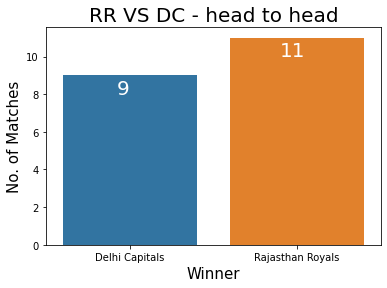

In [14]:
sns.countplot(DR["winner"])
plt.text(-0.08,8,str(DR['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.text(0.9,10,str(DR['winner'].value_counts()['Rajasthan Royals']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('RR VS DC - head to head',fontsize = 20)

In [15]:
DR.groupby(["season","winner"])["winner"].count()

season  winner          
2008    Delhi Capitals      1
        Rajasthan Royals    2
2009    Delhi Capitals      1
        Rajasthan Royals    1
2010    Delhi Capitals      2
2011    Rajasthan Royals    1
2012    Delhi Capitals      2
2013    Rajasthan Royals    2
2014    Rajasthan Royals    2
2015    Rajasthan Royals    2
2018    Delhi Capitals      1
        Rajasthan Royals    1
2019    Delhi Capitals      2
Name: winner, dtype: int64

### Winning Percentage

In [16]:
Winning_Percentage = DR['winner'].value_counts()/len(DR['winner'])

In [17]:
print(" RR winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

 RR winning percentage against DC(overall) : 55%
DC winning percentage against RR(overall) : 45%


### Performance based Analysis

In [18]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [19]:
performance("Delhi Capitals",DR)

Number of times given team win while defending : 4
Number of times given team win while chasing   : 5

Average runs by which a given team wins while defending  :  22.0
Average wickets by which a given team wins while chasing :  6.0


In [20]:
performance("Rajasthan Royals",DR)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  39.0
Average wickets by which a given team wins while chasing :  6.0


### Toss Analysis

In [118]:
DR.groupby(['toss_winner',"toss_decision","winner"])["winner"].count()

toss_winner       toss_decision  winner          
Delhi Capitals    bat            Delhi Capitals      3
                                 Rajasthan Royals    3
                  field          Delhi Capitals      2
                                 Rajasthan Royals    4
Rajasthan Royals  bat            Delhi Capitals      3
                                 Rajasthan Royals    1
                  field          Delhi Capitals      1
                                 Rajasthan Royals    3
Name: winner, dtype: int64

In [119]:
DR.groupby(['toss_winner',"toss_decision"])["toss_decision"].count()

toss_winner       toss_decision
Delhi Capitals    bat              6
                  field            6
Rajasthan Royals  bat              4
                  field            4
Name: toss_decision, dtype: int64

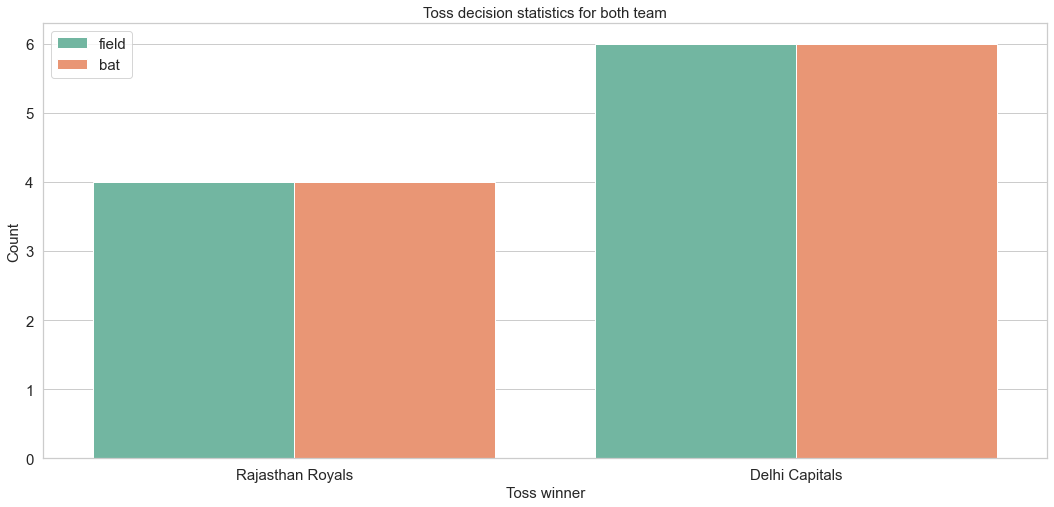

In [120]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(DR['toss_winner'],palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

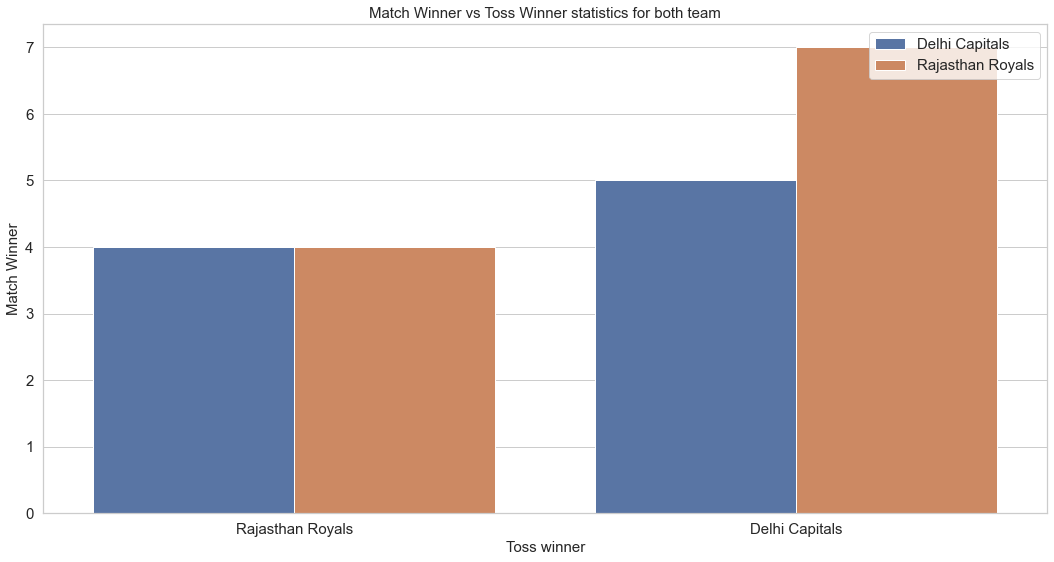

In [121]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DR['toss_winner'],hue=DR['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

Toss Decision based Analysis of both the teams :

In [122]:
RR = DR[DR["toss_winner"]=="Rajasthan Royals"]
DC = DR[DR["toss_winner"]=="Delhi Capitals"]

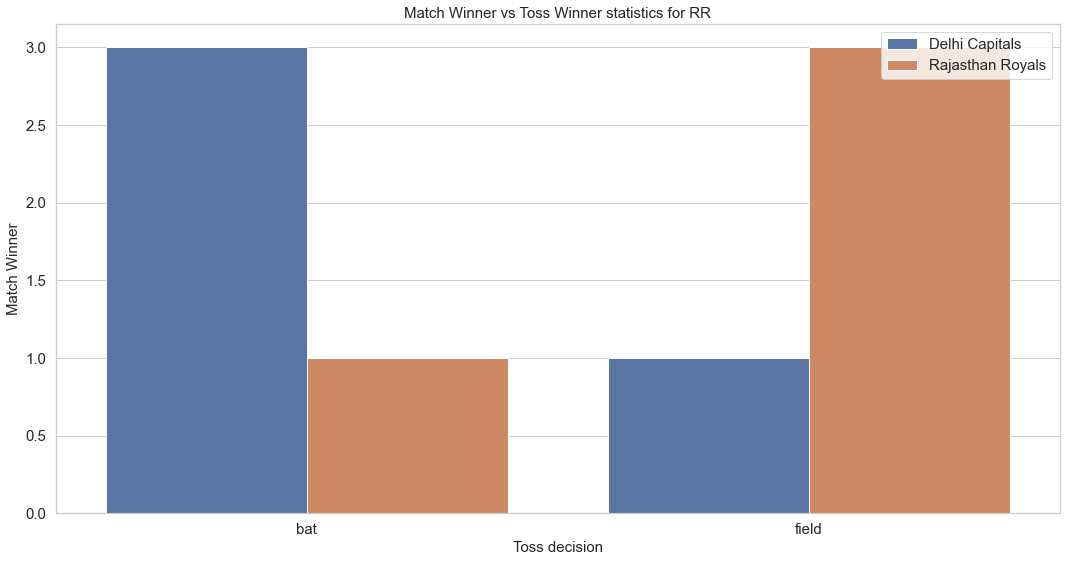

In [123]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

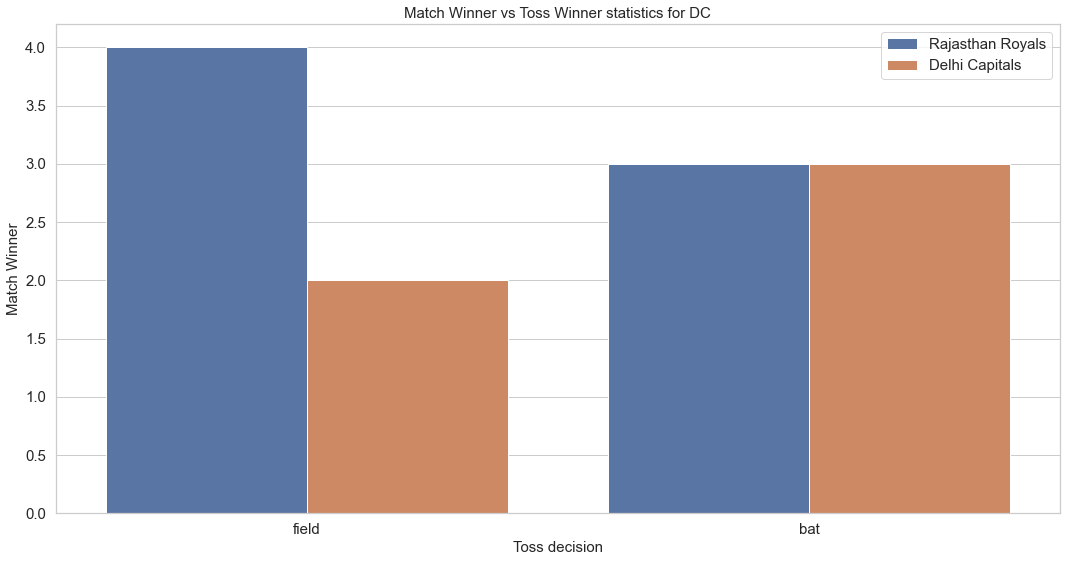

In [124]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [125]:
player = pd.DataFrame(DR.player_of_match.value_counts())
player

,player_of_match
AM Rahane,3
SR Watson,2
V Sehwag,2
RR Pant,2
DJ Hooda,1
P Negi,1
KK Nair,1
SV Samson,1
AB de Villiers,1
MF Maharoof,1


### Recent Year Performance Analysis

In [126]:
cond1 = DR["season"] == 2018
cond2 = DR["season"] == 2019
final = DR[cond1 | cond2]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7899,2018,Jaipur,11/04/18,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium
7925,2018,Delhi,02/05/18,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,1,Delhi Capitals,4,0,RR Pant,Feroz Shah Kotla
11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium
11344,2019,Delhi,04/05/19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground


In [127]:
player = pd.DataFrame(final.player_of_match.value_counts())
player

,player_of_match
RR Pant,2
A Mishra,1
SV Samson,1


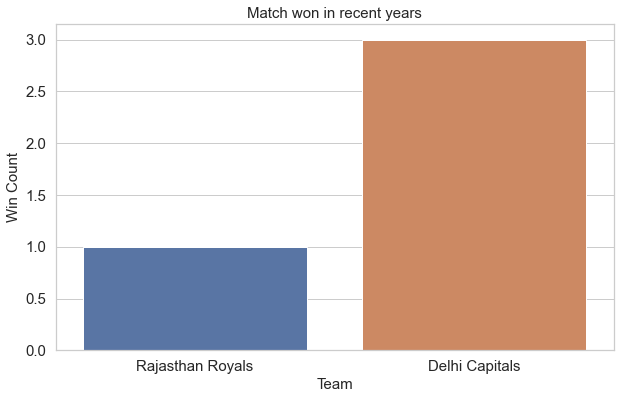

In [128]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

From all the above analysis we can say that though overall Rajasthan Royal looks ahead of DC but in recent years DC has shown some really good performance.

So based on our analysis we predict DC to be the winner for today's match.